In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark', {'axes.grid' : False})

In [69]:
df = pd.read_csv('data_clean.csv')
print(df.shape)
df.head()

(18207, 88)


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [70]:
print(df.columns)
df.dtypes.unique()

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [71]:
# check for NAs again
df.isna().sum().any()

False

### Feature Engineering

In [72]:
dft = df.copy()

In [73]:
# mixing up variables to generate new meaningful features

dft['Marksmanship'] = dft[['Penalties', 'LongShots', 'Crossing', 'HeadingAccuracy', 'FKAccuracy', 'ShortPassing', 'LongPassing', 'Volleys']].mean(axis=1)
dft['OneVsOne'] = dft[['Stamina', 'Jumping', 'Reactions', 'Composure', 'Aggression']].mean(axis=1)
dft['Movement'] = dft[['Acceleration', 'Stamina', 'SprintSpeed', 'Agility']].mean(axis=1)
dft['StylePoints'] = dft[['Skill Moves', 'Dribbling', 'Vision', 'Balance', 'BallControl']].mean(axis=1)
dft['Defending'] = dft[['Marking', 'StandingTackle', 'SlidingTackle', 'Positioning']].mean(axis=1)
dft['Striking'] = dft[['ShotPower', 'Finishing']].mean(axis=1)

dft.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

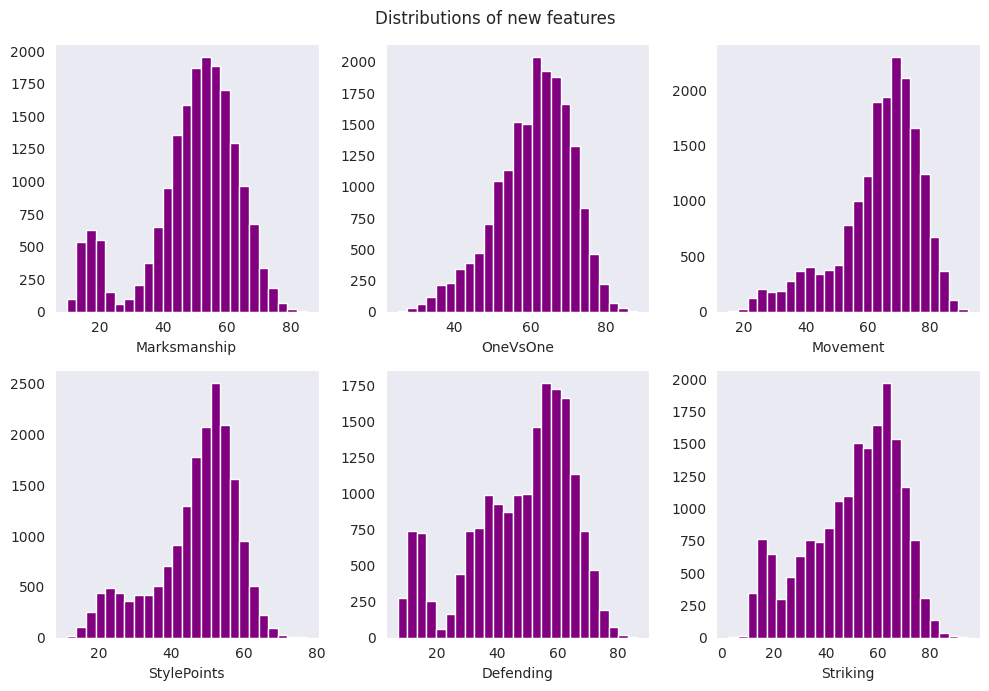

In [74]:
# Visualizing distributions of new features

features = ['Marksmanship', 'OneVsOne', 'Movement', 'StylePoints', 'Defending', 'Striking']
row_len = len(features)//2
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

for i, f in enumerate(features):
  axes[i//row_len, i%row_len].hist(dft[f], bins=25, color='purple')
  axes[i//row_len, i%row_len].set_xlabel(f)

fig.suptitle('Distributions of new features')
plt.tight_layout()
plt.show()


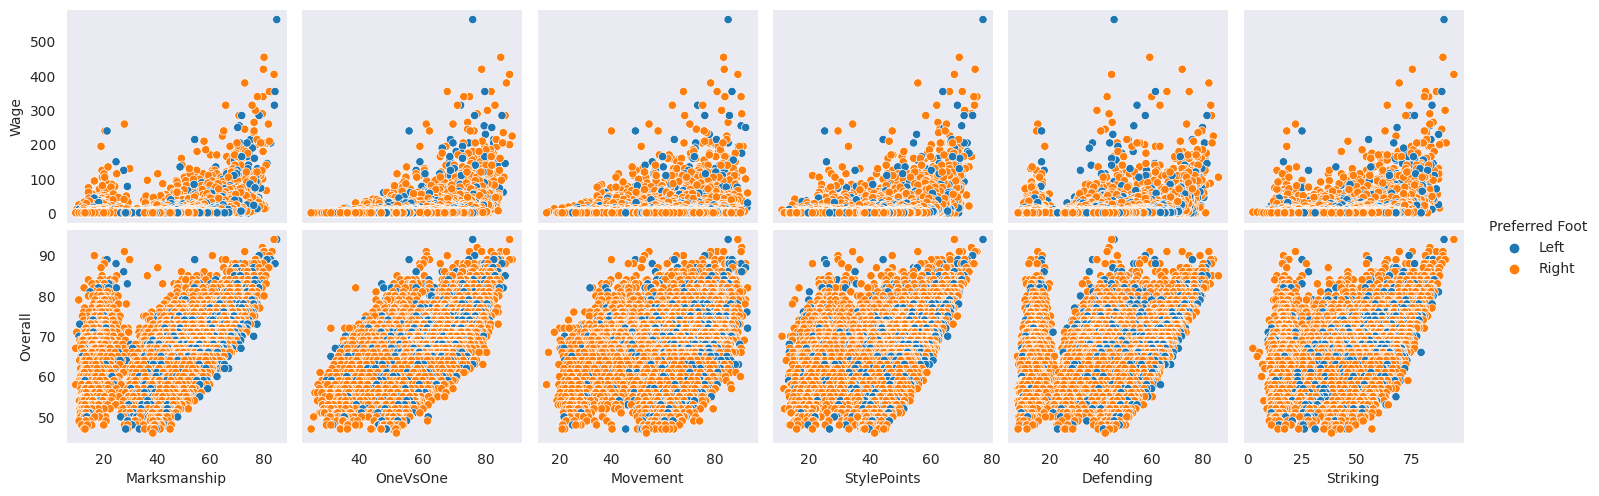

In [87]:
# Difference in wage by new features & Preferred Foot

# removing zero Preferred Foot rows for plots
dft1 = dft.loc[~(dft['Preferred Foot'] == '0'), :]

# Wages by new features
sns.pairplot(data=dft1, y_vars=['Wage', 'Overall'], x_vars=features, hue='Preferred Foot')